In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit


In [2]:
U, Tryk, Temp = np.genfromtxt('Usikkerheder.csv',delimiter=',', skip_header = 1,usecols=(0,1,2),unpack = True)

U_farmer = np.var(U)*10**-12 #[C]

T = np.mean(Temp[0:3])
P_hPa = np.mean(Tryk[0:3])
P = P_hPa/10
print(T, U_farmer)



24.366666666666664 5.69e-12


32 33 32


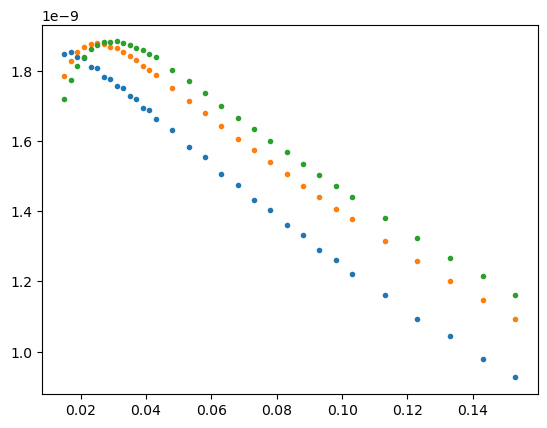

In [3]:
l_6,data_6 = np.genfromtxt('data_6V.csv',delimiter=',', skip_header = 1,usecols=(3,4),unpack = True)
l_10,data_10 = np.genfromtxt('data_10V.csv',delimiter=',', skip_header = 1,usecols=(3,4), unpack = True)
l_15,data_15 = np.genfromtxt('data_15V.csv',delimiter=',', skip_header = 1,usecols=(3,4), unpack = True)

print(len(l_6), len(l_10), len(l_15))
m_6 = data_6 *10**-12
m_10 = data_10 *10**-12
m_15 = data_15 *10**-12

l_10 =  l_10[:-1]
m_10 =  m_10[:-1]
l_6 = l_6/100
l_10 = l_10/100
l_15 = l_15/100

plt.plot(l_6,m_6, '.')
plt.plot(l_10,m_10, '.')
plt.plot(l_15,m_15, '.')


In [5]:
# Konstanter til omregning til grey 
NDWQ0 = 5.3487* 10**7 #[Gy/C]
k_elektrometer = 0.9993
k_QQ0 = 0.991
k_pol = 1.0001
k_s = 1.0026
T_0 = 20 #grader
p_0 = 101.3 #[kPa]

U_baro = 1/10 #[kPa]
U_termo = 0.06 #[grader]
U_x = 0.00001 #[m]



In [6]:

k_tp = ((273.2 + T)*p_0)/((273.2+T_0)*P)
print(k_tp)

U_k_tp = np.sqrt((p_0/((273.2+T_0)*P)*U_termo)**2+(-((273.2 + T)*p_0)/((273.2+T_0)*P**2)*U_baro)**2)
print(U_k_tp)

D_6 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_6
D_10 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_10
D_15 = NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*m_15

max_D = np.max(D_15)
Dp_6 = D_6/max_D * 100
Dp_10 = D_10/max_D *100
Dp_15 = D_15/max_D *100

print(D_6)

U_D6 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_6*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)
U_D10 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_10*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)
U_D15 = np.sqrt((NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*m_15*U_k_tp)**2+(NDWQ0*k_elektrometer*k_pol*k_QQ0*k_s*k_tp*U_farmer)**2)

print(U_D6)


1.0152606181650488
0.0010232805005986664
[0.09975581 0.10007934 0.09932443 0.09916266 0.09776069 0.09759892
 0.09619695 0.09587342 0.0948489  0.09441752 0.09328516 0.09279986
 0.09134396 0.09102043 0.08978022 0.0880008  0.08541254 0.0838488
 0.08120662 0.07958896 0.07727031 0.07570657 0.073334   0.07182418
 0.06955945 0.06799571 0.06578491 0.06260351 0.05899073 0.05624071
 0.05273577 0.04993182]
[0.00032287 0.00032297 0.00032274 0.00032268 0.00032225 0.0003222
 0.00032177 0.00032167 0.00032136 0.00032124 0.0003209  0.00032076
 0.00032033 0.00032024 0.00031988 0.00031938 0.00031866 0.00031824
 0.00031755 0.00031713 0.00031655 0.00031616 0.00031559 0.00031524
 0.00031472 0.00031438 0.0003139  0.00031324 0.00031252 0.00031201
 0.00031139 0.00031092]


''

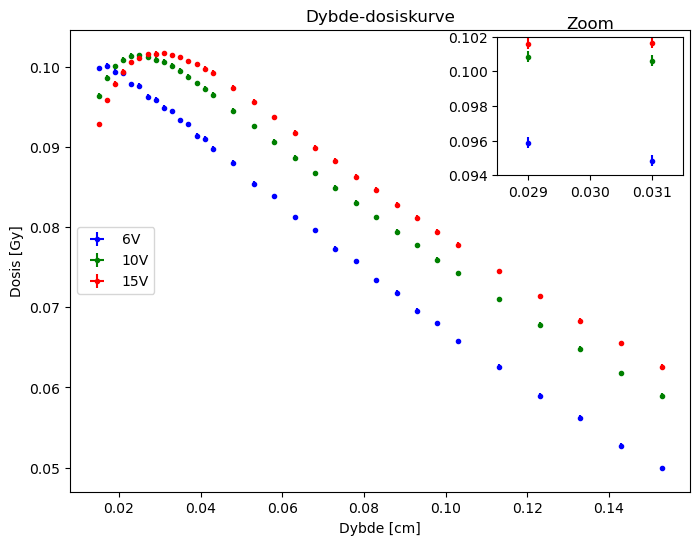

In [43]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

fig, ax = plt.subplots(figsize = (8,6))


ax.errorbar(l_6,D_6,yerr = U_D6, xerr = U_x,fmt = '.', color = 'blue', label = '6V')
ax.errorbar(l_10,D_10,yerr = U_D10, xerr = U_x ,fmt = '.' , color = 'green',label = '10V')
ax.errorbar(l_15,D_15,yerr = U_D15, xerr = U_x, fmt = '.', color = 'red', label = '15V')
ax.legend(loc='center left')

ax.set_xlabel('Dybde [cm]')
ax.set_ylabel('Dosis [Gy]')
ax.set_title('Dybde-dosiskurve')

ax_inset = inset_axes(ax, width = "30%", height = "30%", loc = "upper right")
ax_inset.errorbar(l_6,D_6,yerr = U_D6, xerr = U_x, color = 'blue', fmt = '.' )
ax_inset.errorbar(l_10,D_10,yerr = U_D10, xerr = U_x , color = 'green',fmt = '.')
ax_inset.errorbar(l_15,D_15,yerr = U_D15, xerr = U_x,color = 'red',fmt = '.')
ax_inset.set_xlim(0.0285,0.0315)
ax_inset.set_ylim(0.094,0.102)
#ax_inset.set_xlabel('Dybde [cm]')
#ax_inset.set_ylabel('Dosis [Gy]')
ax_inset.set_title('Zoom')



;

Text(0.5, 1.0, 'Zoom')

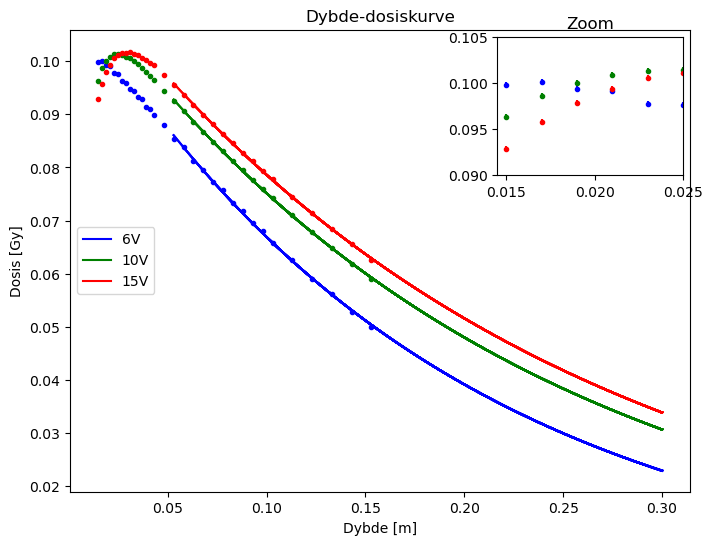

In [51]:

def exp(x,a,c):
    y = np.exp(- a*x) * c
    return y


par_6, cov_6 = curve_fit(exp,l_6[16:],D_6[16:], sigma = U_D6[16:], absolute_sigma= True)
par_10, cov_10 = curve_fit(exp,l_10[16:],D_10[16:], sigma = U_D10[16:], absolute_sigma= True)
par_15, cov_15 = curve_fit(exp,l_15[16:],D_15[16:], sigma = U_D15[16:], absolute_sigma= True)

X_6 = np.linspace(l_6[16:],0.3)
X_10 = np.linspace(l_10[16:],0.3)
X_15 = np.linspace(l_15[16:],0.3)



fig, ax = plt.subplots(figsize = (8,6))

ax.plot(X_6,exp(X_6,*par_6), color = 'blue', label = '6V')
ax.plot(X_10,exp(X_10,*par_10), color = 'green', label = '10V')
ax.plot(X_15,exp(X_15,*par_15), color = 'red', label = '15V')


ax.errorbar(l_6,D_6,yerr = U_D6, xerr = U_x,fmt = '.', color = 'blue', label = '6V - data')
ax.errorbar(l_10,D_10,yerr = U_D10, xerr = U_x ,fmt = '.' , color = 'green', label = '10V - data ')
ax.errorbar(l_15,D_15,yerr = U_D15, xerr = U_x, fmt = '.', color = 'red', label = '15V - data ')

# Manually add the labels for the fit curves (only once)
line_6 = ax.plot(X_6, exp(X_6, *par_6), color='blue')[0]
line_10 = ax.plot(X_10, exp(X_10, *par_10), color='green')[0]
line_15 = ax.plot(X_15, exp(X_15, *par_15), color='red')[0]

# Add legend, manually handling the fit curves and data
ax.legend(handles=[line_6, line_10, line_15], labels=['6V', '10V', '15V'], loc='center left', bbox_to_anchor=(0, 0.5))

ax.set_xlabel('Dybde [m]')
ax.set_ylabel('Dosis [Gy]')
ax.set_title('Dybde-dosiskurve')

ax_inset = inset_axes(ax, width = "30%", height = "30%", loc = "upper right")
ax_inset.errorbar(l_6,D_6,yerr = U_D6, xerr = U_x, color = 'blue', fmt = '.' )
ax_inset.errorbar(l_10,D_10,yerr = U_D10, xerr = U_x , color = 'green', fmt = '.')
ax_inset.errorbar(l_15,D_15,yerr = U_D15, xerr = U_x, color = 'red', fmt = '.')
ax_inset.set_xlim(0.0145,0.025)
ax_inset.set_ylim(0.09,0.105)
#ax_inset.set_xlabel('Dybde [m]')
#ax_inset.set_ylabel('Dosis [Gy]')
ax_inset.set_title('Zoom')

In [9]:
l20_6 = exp(0.20,*par_6)
l20_10 = exp(0.20,*par_10)
l20_15 = exp(0.20,*par_15)

l10_6 = exp(0.10,*par_6)
l10_10 = exp(0.10,*par_10)
l10_15 = exp(0.10,*par_15)

print(l20_6,l20_10, l20_15)

DD_6 = l20_6 / l10_6
DD_10 = l20_10 / l10_10
DD_15 = l20_15 / l10_15

print("DD'er ",DD_6, DD_10, DD_15)

TPR_6 = 1.2661* DD_6 - 0.0595
TPR_10 = 1.2661* DD_10 - 0.0595
TPR_15 = 1.2661* DD_15 - 0.0595

print("TPR" ,TPR_6,TPR_10,TPR_15)

0.03914986316038412 0.04799813076221095 0.05159161289098082
DD'er  0.5851787141830965 0.6387486874286247 0.6563368588731759
TPR 0.6813947700272185 0.7492197131533817 0.7714880970193281


In [10]:
#Usikerheder på parameter 
U_6 = np.sqrt(np.diagonal(cov_6))
U_10 = np.sqrt(np.diagonal(cov_10))
U_15 = np.sqrt(np.diagonal(cov_15))

print(U_6, U_10, U_15 )

U6 = np.sqrt((-D_6*np.exp(-par_6[0]*D_6)*par_6[1]*U_6[0])**2+(np.exp(-par_6[0]*D_6)*U_6[1])**2+(-par_6[0]*np.exp(-par_6[0]*D_6)*par_6[1]*U_D6)**2)
print(U6)

[0.04130199 0.00042979] [0.03671251 0.00039924] [0.03510561 0.00039055]
[0.00039119 0.00039116 0.00039124 0.00039126 0.00039141 0.00039143
 0.00039159 0.00039162 0.00039174 0.00039179 0.00039191 0.00039197
 0.00039214 0.00039217 0.00039232 0.00039254 0.00039287 0.00039308
 0.00039345 0.0003937  0.00039407 0.00039434 0.00039479 0.00039509
 0.00039558 0.00039595 0.00039651 0.00039742 0.0003986  0.00039962
 0.00040111 0.00040246]


In [11]:
# Teoretiskværdi af PDD 
print((0.667+0.0595)/1.2661)
print((0.736+0.0595)/1.2661)
print((0.761+0.0595)/1.2661)

0.5738093357554696
0.6283074006792513
0.6480530763762736
